In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, BatchNormalization, Dropout, ZeroPadding2D
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2, l1

(X_train_255, y_train), (X_test_255, y_test)= fashion_mnist.load_data()

X_train = X_train_255.astype('float32') / 255
X_test = X_test_255.astype('float32') / 255

BEFORE:



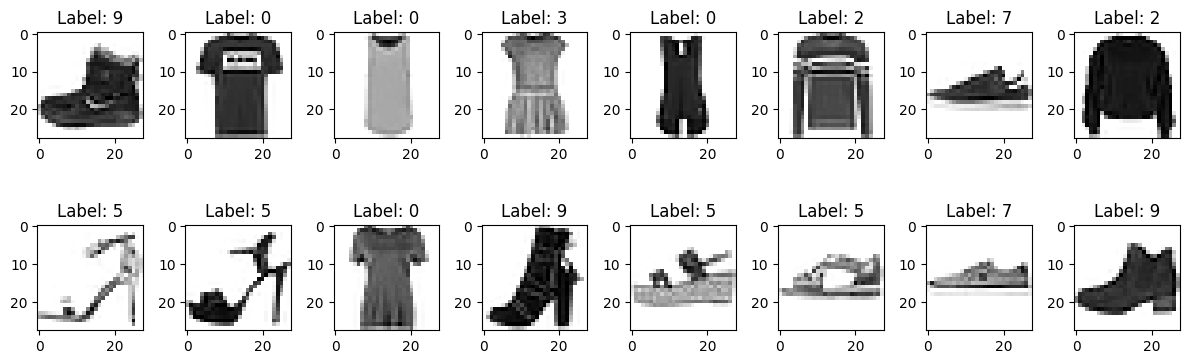

AFTER:



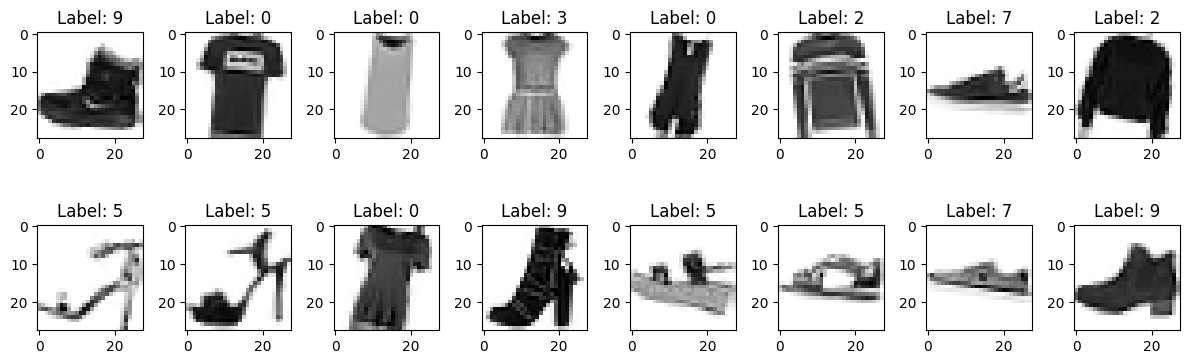

In [2]:
# specify the maximum rotation_range angle
rotation_range_val = 15
# import relevant library
# create the class object
datagen = ImageDataGenerator(rotation_range=rotation_range_val, width_shift_range=0.2, horizontal_flip=True)
# fit the generator
datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
# define number of rows & columns
num_row = 2
num_col = 8
num= num_row*num_col
# plot before
print('BEFORE:\n')
# plot images
fig1, axes1 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
     ax = axes1[i//num_col, i%num_col]
     ax.imshow(X_train[i], cmap='gray_r')
     ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()
# plot after
print('AFTER:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1), y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
          ax.set_title('Label: {}'.format(int(Y[i])))
     break

plt.tight_layout()  
plt.show()

In [2]:
y_train = to_categorical(y_train).astype('float32')
y_test = to_categorical(y_test).astype('float32')

In [86]:
X_train = np.array([i.flatten() for i in X_train])
X_test = np.array([i.flatten() for i in X_test])

In [35]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [50]:
model = Sequential()

model.add(Dense(200, input_shape=(784, ), activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0872 - accuracy: 0.8236 - val_loss: 0.0745 - val_accuracy: 0.8514
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0639 - accuracy: 0.8691 - val_loss: 0.0677 - val_accuracy: 0.8611
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0580 - accuracy: 0.8816 - val_loss: 0.0649 - val_accuracy: 0.8669
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0539 - accuracy: 0.8895 - val_loss: 0.0630 - val_accuracy: 0.8717
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0508 - accuracy: 0.8962 - val_loss: 0.0612 - val_accuracy: 0.8759
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0484 - accuracy: 0.9002 - val_loss: 0.0620 - val_accuracy: 0.8756
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0460 - accuracy: 0.9064 - val_loss: 0.0641 - val_accuracy:

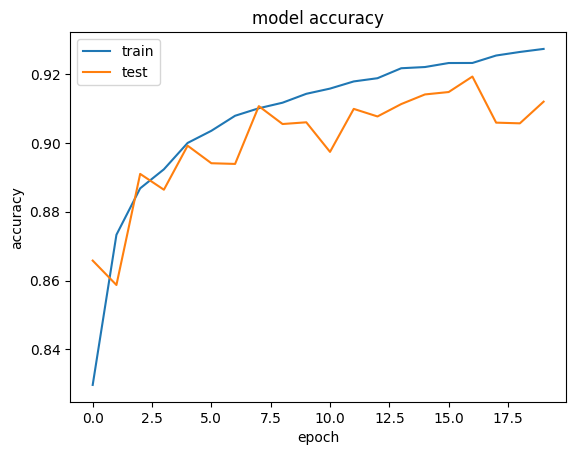

In [89]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

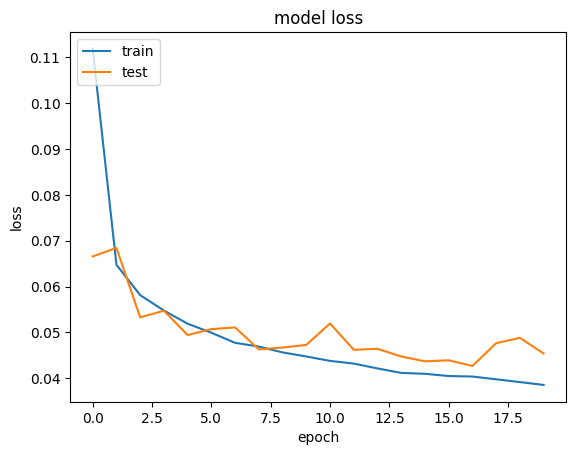

In [90]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
(X_train_255, y_train), (X_test_255, y_test)= fashion_mnist.load_data()

X_train = X_train_255.astype('float32') / 255
X_test = X_test_255.astype('float32') / 255

y_train = to_categorical(y_train).astype('float32')
y_test = to_categorical(y_test).astype('float32')

In [56]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(14*14, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 20s 4ms/step - loss: 0.0741 - accuracy: 0.8565 - val_loss: 0.0600 - val_accuracy: 0.8829
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0496 - accuracy: 0.9038 - val_loss: 0.0517 - val_accuracy: 0.8968
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0420 - accuracy: 0.9189 - val_loss: 0.0470 - val_accuracy: 0.9062
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0368 - accuracy: 0.9301 - val_loss: 0.0474 - val_accuracy: 0.9082
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0322 - accuracy: 0.9387 - val_loss: 0.0446 - val_accuracy: 0.9170
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0283 - accuracy: 0.9482 - val_loss: 0.0451 - val_accuracy: 0.9164
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0248 - accuracy: 0.9545 - val_loss: 0.0485 - val_accuracy

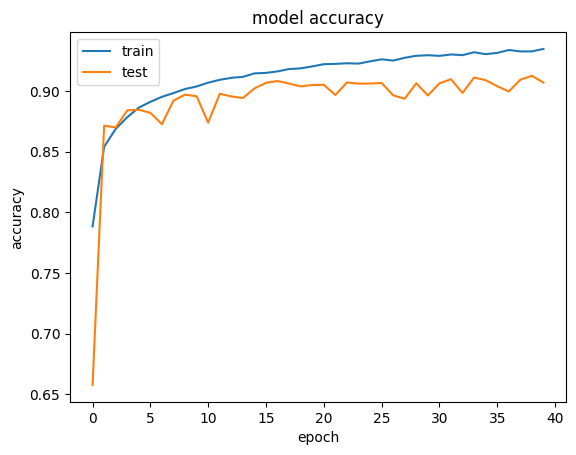

In [105]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

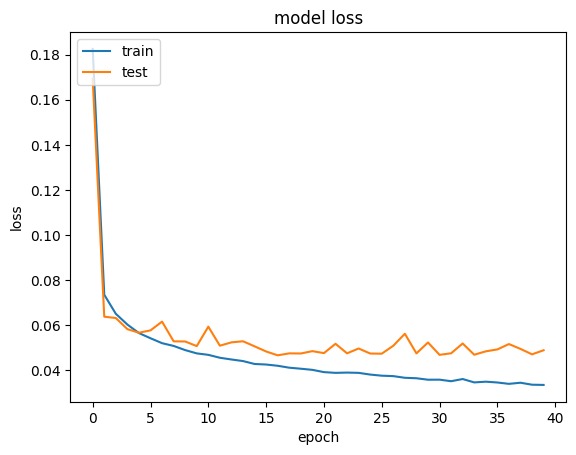

In [104]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [3]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(rate=0.2))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=200, epochs=25, validation_data=(X_test, y_test))

Epoch 1/25
300/300 [==============================] - 18s 49ms/step - loss: 0.1064 - accuracy: 0.7919 - val_loss: 0.4295 - val_accuracy: 0.1898
Epoch 2/25
300/300 [==============================] - 14s 48ms/step - loss: 0.0630 - accuracy: 0.8779 - val_loss: 0.1143 - val_accuracy: 0.7866
Epoch 3/25
300/300 [==============================] - 14s 48ms/step - loss: 0.0543 - accuracy: 0.8946 - val_loss: 0.0542 - val_accuracy: 0.8888
Epoch 4/25
300/300 [==============================] - 14s 48ms/step - loss: 0.0491 - accuracy: 0.9030 - val_loss: 0.0517 - val_accuracy: 0.8941
Epoch 5/25
300/300 [==============================] - 14s 48ms/step - loss: 0.0458 - accuracy: 0.9095 - val_loss: 0.0464 - val_accuracy: 0.9073
Epoch 6/25
300/300 [==============================] - 14s 48ms/step - loss: 0.0434 - accuracy: 0.9146 - val_loss: 0.0456 - val_accuracy: 0.9078
Epoch 7/25
300/300 [==============================] - 15s 48ms/step - loss: 0.0411 - accuracy: 0.9195 - val_loss: 0.0420 - val_accuracy:

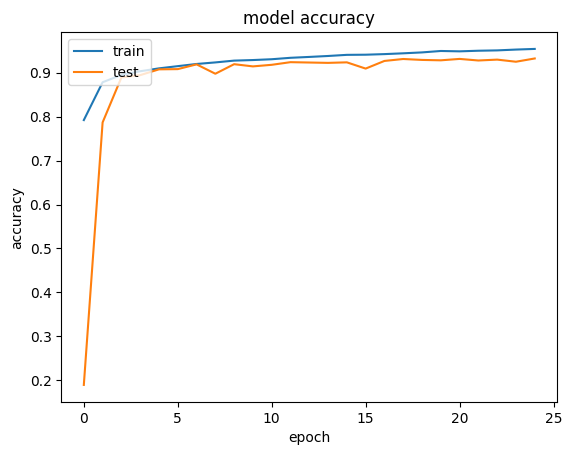

In [4]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

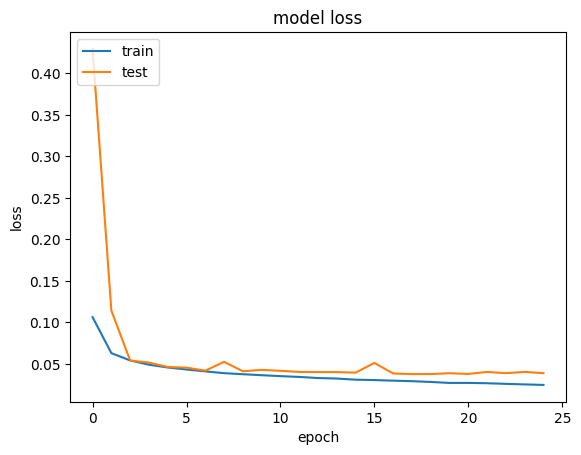

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [97]:
visualizer(model)

IndexError: list index out of range

In [117]:
model = Sequential()

model.add(Conv2D(32, 3, input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(14*14, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1055 - accuracy: 0.8376 - val_loss: 0.0680 - val_accuracy: 0.8621
Epoch 2/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0594 - accuracy: 0.8823 - val_loss: 0.0712 - val_accuracy: 0.8546
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0515 - accuracy: 0.8984 - val_loss: 0.0572 - val_accuracy: 0.8856
Epoch 4/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0465 - accuracy: 0.9086 - val_loss: 0.0521 - val_accuracy: 0.8936
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0425 - accuracy: 0.9162 - val_loss: 0.0531 - val_accuracy: 0.8951
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0390 - accuracy: 0.9240 - val_loss: 0.0565 - val_accuracy: 0.8886
Epoch 7/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0354 - accuracy: 0.9318 - val_loss: 0.0580 - val_ac

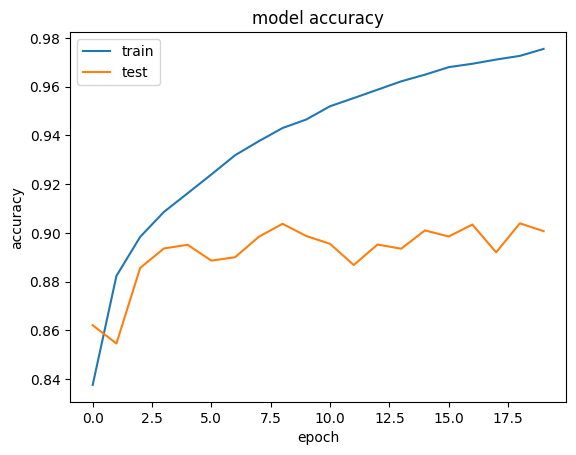

In [118]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

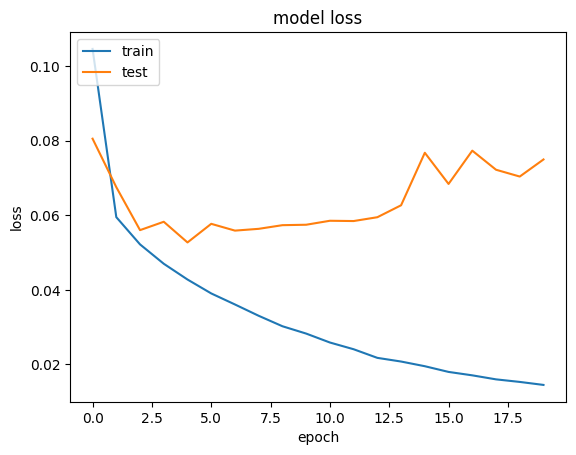

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [114]:
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same', 
            input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),        
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),    
    MaxPooling2D(pool_size=(2, 2)),   
    
    Flatten(),
    
    Dense(1024, activation='relu'),
    
    Dense(512, activation='relu'),
    
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0670 - accuracy: 0.8630 - val_loss: 0.0513 - val_accuracy: 0.8944
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0458 - accuracy: 0.9089 - val_loss: 0.0461 - val_accuracy: 0.9055
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0389 - accuracy: 0.9232 - val_loss: 0.0497 - val_accuracy: 0.9041
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0336 - accuracy: 0.9353 - val_loss: 0.0482 - val_accuracy: 0.9068
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0291 - accuracy: 0.9439 - val_loss: 0.0404 - val_accuracy: 0.9232
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0251 - accuracy: 0.9523 - val_loss: 0.0389 - val_accuracy: 0.9319
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0215 - accuracy: 0.9592 - val_loss: 0.0426 -

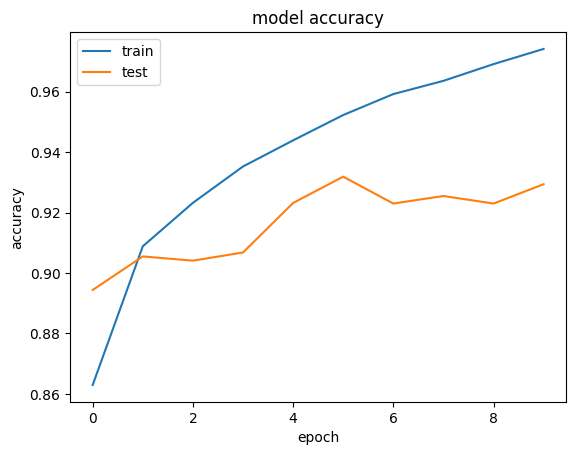

In [115]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

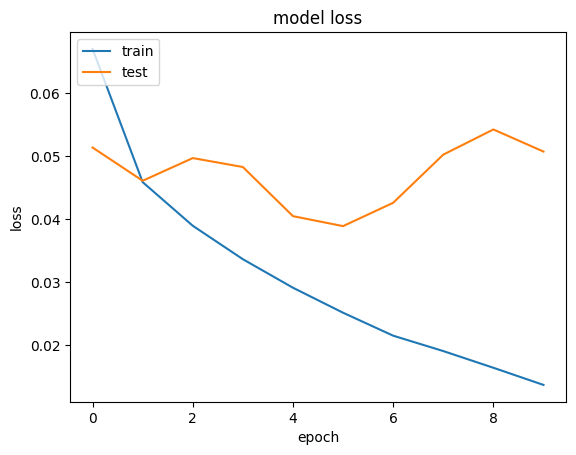

In [116]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()